In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from glob import glob

In [2]:
train_path = "fruits-360_dataset/fruits-360/Training/"
test_path = "fruits-360_dataset/fruits-360/Test/"

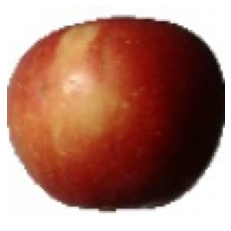

In [3]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [5]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

NumberOfClass:  131


In [6]:
#%% CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])


In [7]:
batch_size = 32

In [8]:
#%% Data Generation - Train - Test
train_datagen = ImageDataGenerator(rescale= 1./255,# Grayscale normalization is done to prevent color differences.
                                       # With normalization, all colors are drawn to the 0-1 range.
                   shear_range = 0.3, # #shearing can be thought of as a certain amount of pulling the image
                   horizontal_flip=True, # #vertical mirror image
                   zoom_range = 0.3) # #Randomly enlarge images by 30%

# It is more important that the data to be tested is original. However, it needs to be rescaled. 
# Because if the data is being trained in a rescaled way, it should also be rescaled while testing.

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb", # If grayscale is made, it should be known that it is rgb.
        class_mode= "categorical") # there are multiple classes.

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb", # If grayscale is made, it should be known that it is rgb.
        class_mode= "categorical") # there are multiple classes.

hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=100,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


<ipython-input-8-b97a4d6774f6>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
50/50 [==============================] - 15s 231ms/step - loss: 4.6957 - accuracy: 0.0244 - val_loss: 4.2448 - val_accuracy: 0.0637
Epoch 2/100
50/50 [==============================] - 11s 225ms/step - loss: 3.8614 - accuracy: 0.1125 - val_loss: 3.4474 - val_accuracy: 0.1863
Epoch 3/100
50/50 [==============================] - 11s 222ms/step - loss: 3.2802 - accuracy: 0.1569 - val_loss: 2.6485 - val_accuracy: 0.3075
Epoch 4/100
50/50 [==============================] - 11s 221ms/step - loss: 2.6271 - accuracy: 0.2725 - val_loss: 2.0818 - val_accuracy: 0.4075
Epoch 5/100
50/50 [==============================] - 11s 220ms/step - loss: 2.2567 - accuracy: 0.3450 - val_loss: 1.4843 - val_accuracy: 0.5838
Epoch 6/100
50/50 [==============================] - 11s 224ms/step - loss: 1.8600 - accuracy: 0.4481 - val_loss: 1.4789 - val_accuracy: 0.5788
Epoch 7/100
50/50 [==============================] - 11s 227ms/step - loss: 1.6067 - accuracy: 0.5063 - val_loss: 1.4763 - val_accuracy:

50/50 [==============================] - 11s 209ms/step - loss: 0.2010 - accuracy: 0.9406 - val_loss: 0.1446 - val_accuracy: 0.9575
Epoch 58/100
50/50 [==============================] - 10s 204ms/step - loss: 0.2049 - accuracy: 0.9469 - val_loss: 0.2127 - val_accuracy: 0.9413
Epoch 59/100
50/50 [==============================] - 10s 202ms/step - loss: 0.1728 - accuracy: 0.9456 - val_loss: 0.2595 - val_accuracy: 0.9325
Epoch 60/100
50/50 [==============================] - 10s 200ms/step - loss: 0.1993 - accuracy: 0.9319 - val_loss: 0.2495 - val_accuracy: 0.9400
Epoch 61/100
50/50 [==============================] - 10s 208ms/step - loss: 0.2129 - accuracy: 0.9356 - val_loss: 0.4834 - val_accuracy: 0.8825
Epoch 62/100
50/50 [==============================] - 10s 199ms/step - loss: 0.1757 - accuracy: 0.9431 - val_loss: 0.3835 - val_accuracy: 0.9000
Epoch 63/100
50/50 [==============================] - 10s 202ms/step - loss: 0.1999 - accuracy: 0.9419 - val_loss: 0.6423 - val_accuracy: 0.867

In [9]:
model.save_weights("cnn_fruit_hist.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


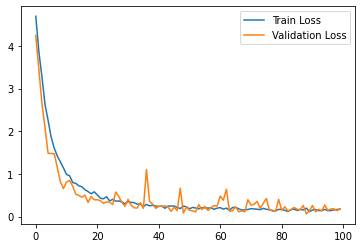

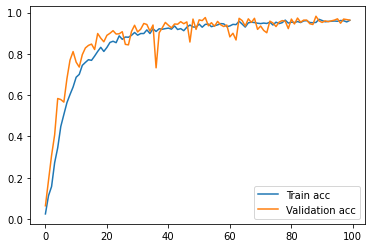

In [10]:
#%% model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [11]:
#%% save history
import json
with open("cnn_fruit_hist.json","w") as f:
    json.dump(hist.history, f)

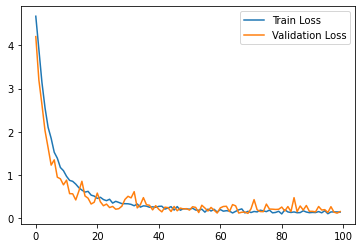

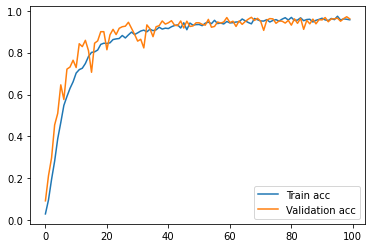

In [12]:
#%% load history
import codecs
with codecs.open("deneme.json", "r",encoding = "utf-8") as f:
    h = json.loads(f.read())
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train acc")
plt.plot(h["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()